In [69]:
import sys

# laptop
sys.path.append( '/home/greg/current/NMEG_utils/py_modules/' )
af_path = '/home/greg/sftp/eddyflux/Ameriflux_files/provisional/'
# UNM desktop
#sys.path.append( '..\\NMEG_utils\\py_modules\\' )
#af_path = 'C:\\Research_Flux_Towers\\Ameriflux_files\\'
#fig_path = 'figures\\multiyear_figs\\'

import load_nmeg as ld
import transform_nmeg as tr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
#import ipdb as ipdb

%matplotlib inline
sns.set_style("white")

/home/greg/data/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [2]:
# Years to load
start = 2009
end = 2014
# Sites to load (pulls list of AF sites from plot_nmeg module)
sites = ['Mpj', 'Mpg']
# Fill a dict with multiyear dataframes for each site in sites
hourly = { x : 
          ld.get_multiyr_aflx( 'US-' + x, af_path, gapfilled=True, startyear=start, endyear=end) 
          for x in sites }

Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Mpj_2009_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Mpj_2010_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Mpj_2011_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Mpj_2012_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Mpj_2013_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Mpj_2014_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Mpg_2009_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Mpg_2010_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Mpg_2011_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Mpg_2012_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Mpg_2013_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_

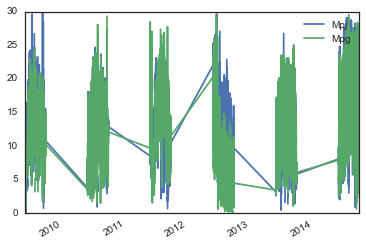

In [70]:
hourly[ 'Mpj' ] = hourly[ 'Mpj' ][ np.logical_and(hourly[ 'Mpj' ].index.month < 11, hourly[ 'Mpj' ].index.month > 4)  ]
hourly[ 'Mpg' ] = hourly[ 'Mpg' ][ np.logical_and(hourly[ 'Mpg' ].index.month < 11, hourly[ 'Mpg' ].index.month > 4)  ]
hourly[ 'Mpj' ].H2O.plot()
hourly[ 'Mpg' ].H2O.plot()
plt.legend(['Mpj', 'Mpg'])
plt.show()

## Plot Mpj vs Mpg H2O

/home/greg/data/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


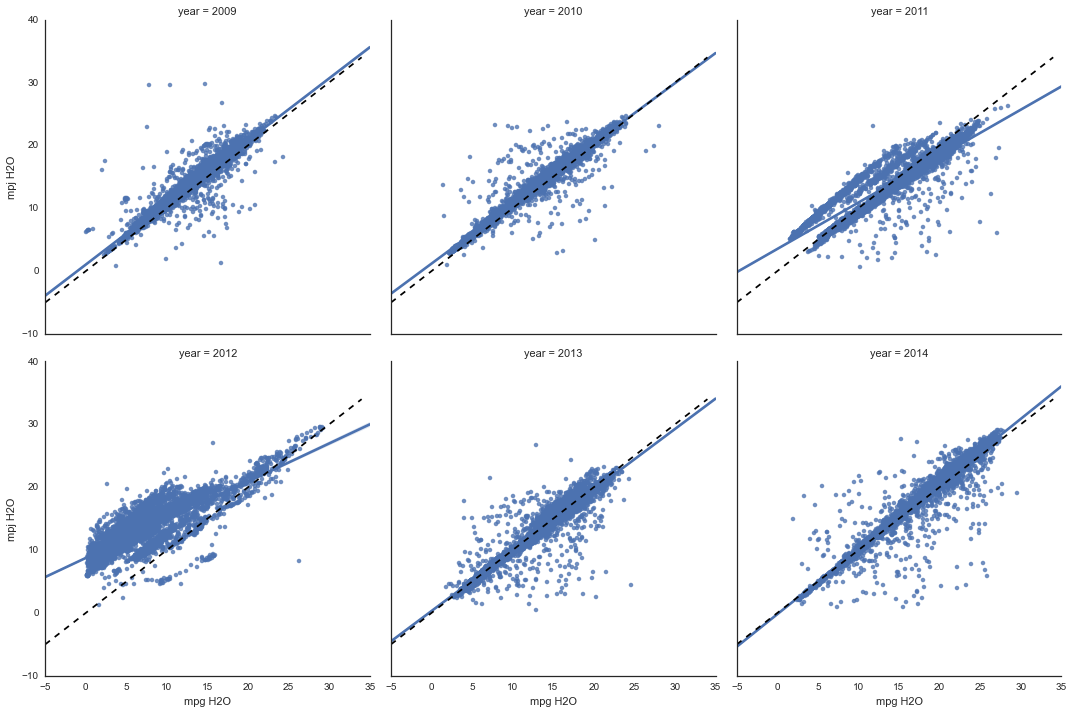

In [72]:

# Concatenate dataframe and make lm plots
df = pd.concat([hourly[ 'Mpj' ].H2O, hourly[ 'Mpg' ].H2O,
                pd.Series(hourly[ 'Mpg' ].index.year, hourly['Mpg'].index)], axis=1)
df.columns = ['mpj H2O','mpg H2O', 'year']

p = sns.lmplot('mpg H2O','mpj H2O', data=df, col='year', col_wrap=3)
for ax in p.axes.flat:
    ax.plot(range(-5, 35), range(-5, 35), '--k')

## Plot Mpj vs Mpg Latent Heat Flux

/home/greg/data/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


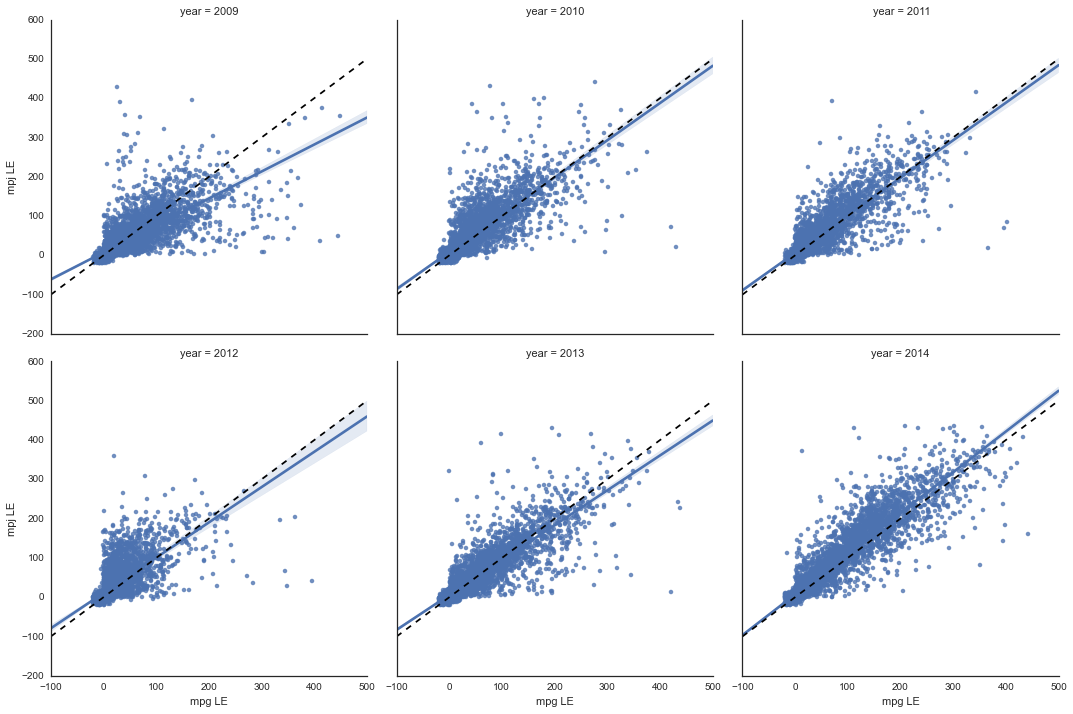

In [73]:
# Concatenate dataframe and make lm plots
df = pd.concat([hourly[ 'Mpj' ].LE_F, hourly[ 'Mpg' ].LE_F,
                pd.Series(hourly[ 'Mpg' ].index.year, hourly['Mpg'].index)], axis=1)
df.columns = ['mpj LE','mpg LE', 'year']
#plt.figure()
#plt.plot(range(-100, 500), range(-100, 500), '--k')
p = sns.lmplot('mpg LE', 'mpj LE', data=df, col='year', col_wrap=3)
for ax in p.axes.flat:
    ax.plot(range(-100, 500), range(-100, 500), '--k')
